## Case: Hand-written digit recognition

In [1]:
#pip install keras==2.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install tensorflow==2.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
Note: you may need to restart the kern

In [4]:
pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.1 MB/s eta 0:00:00 0:00:01
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load the libraries.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import datetime as dt  
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist

%matplotlib inline

In [6]:
from keras.datasets import mnist

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests 
from sklearn.linear_model import LogisticRegression

Import the LeCun et al. MNIST dataset of handwritten characters

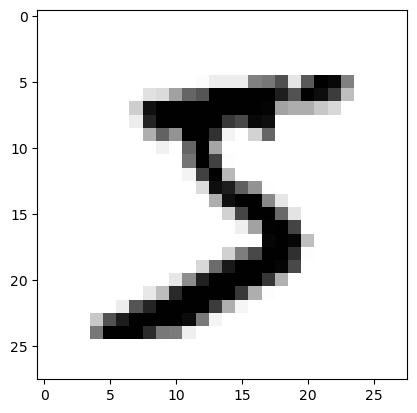

Training label(s): [5]


In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 1
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training label(s): %s' % (y_train[0:num_digits],))

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[0]

5

In [12]:
X_train[0,10:20,10:20]

array([[  1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,  35, 241, 225, 160, 108,   1,   0,   0],
       [  0,   0,   0,  81, 240, 253, 253, 119,  25,   0],
       [  0,   0,   0,   0,  45, 186, 253, 253, 150,  27],
       [  0,   0,   0,   0,   0,  16,  93, 252, 253, 187],
       [  0,   0,   0,   0,   0,   0,   0, 249, 253, 249],
       [  0,   0,   0,   0,  46, 130, 183, 253, 253, 207],
       [  0,   0,  39, 148, 229, 253, 253, 253, 250, 182]], dtype=uint8)

In [13]:
y_train[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

### These are grey scale images that can be converted to dataframes
* The darker the pixel, the larger the value in the cell.  
* The data is 28 X 28 pixel grids of 0-255 grey scale

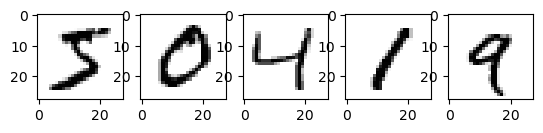

Training labels: [5 0 4 1 9]


In [14]:
num_digits = 5
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training labels: %s' % (y_train[0:num_digits],))

In [15]:
# Preprocess the NMIST data, which are stored as 28 X 28 pixels of grayscale between 1 and 255.

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], num_pixels).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], num_pixels).astype('float32')) / 255

In [16]:
# Keras needs the labels as categorical matrics.

y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)
num_classes = y_test_pp.shape[1]

In [17]:
y_test[0]

7

In [18]:
28**2

784

In [19]:
y_test_pp[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Logistic regression

In [20]:
#logistic regression
classifier = LogisticRegression()
classifier.fit(X_train_pp, y_train)

print(classifier.score(X_test_pp, y_test))

0.9256


### Random forest

In [21]:
#Random forest
rf = RandomForestClassifier(max_depth=10, oob_score=True, random_state=123456)
rf.fit(X_train_pp, y_train)

predicted = rf.predict(X_test_pp)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.947


### Neural network

In [22]:
# Define a simple MLP with three hidden layers of 150, 300, and 150 neurons, respectively.
# First line of code: set a seed for replication.
# Second: Define the model to be sequential using Keras.
# Next three lines: 
    # Define the MLP, where number units sets the number of neurons
    # input_dim is the dimension of the data flowing in and passing through the layers.  It remains fixed.
    # activation is the sigmoidal shape of a neuron, here using the rectified linear unit or 'relu'
# Final line: 
    # We map into the number of classes we have for the digits with the softmax activation, which just chooses
    # the most probable.
    #use soft-max activation: https://en.wikipedia.org/wiki/Softmax_function

np.random.seed(2019)
model = Sequential()
model.add(Dense(units=300, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/10


2024-10-10 10:38:45.547700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


300/300 - 1s - loss: 0.3052 - categorical_accuracy: 0.9093 - val_loss: 0.1299 - val_categorical_accuracy: 0.9609 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1084 - categorical_accuracy: 0.9670 - val_loss: 0.0944 - val_categorical_accuracy: 0.9711 - 833ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0726 - categorical_accuracy: 0.9777 - val_loss: 0.0754 - val_categorical_accuracy: 0.9771 - 819ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0536 - categorical_accuracy: 0.9828 - val_loss: 0.0775 - val_categorical_accuracy: 0.9773 - 838ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0405 - categorical_accuracy: 0.9870 - val_loss: 0.0753 - val_categorical_accuracy: 0.9784 - 850ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0319 - categorical_accuracy: 0.9894 - val_loss: 0.0775 - val_categorical_accuracy: 0.9778 - 855ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0276 - categorical_accuracy: 0.9911 - val_loss: 0.0880 - val_categorical_accuracy: 0.9

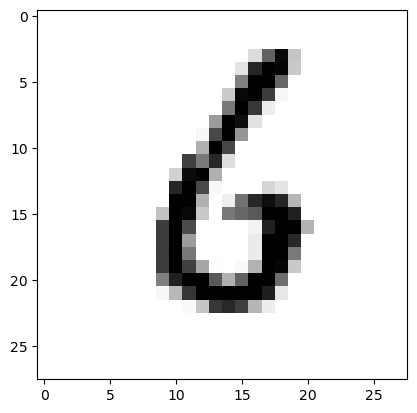

Classified as a 6 with probability 0.999994


In [23]:
# Examine the performance of the 50th image in the test set.

img = 50
plt.imshow(X_test[img], cmap=plt.get_cmap('gray_r'))
#plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [24]:
# Standard measures of performance.
# First the accuracy rate on the test or validation set.

from sklearn.metrics import accuracy_score
print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))

Accuracy Rate: 0.977700


In [25]:
# Next the confusion matrix, which shows correct and incorrect classification on the test set.

from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))

Confusion matrix:
[[ 966    0    0    2    0    1    4    2    4    1]
 [   0 1127    1    2    0    1    2    2    0    0]
 [   4    3 1009    2    1    0    0    8    4    1]
 [   0    0    2  989    0    4    0    5    5    5]
 [   0    1    2    0  946    1    5    7    1   19]
 [   1    1    0   10    0  873    2    0    3    2]
 [   3    2    1    1    6   17  926    0    2    0]
 [   0    3    5    2    0    0    0 1004    2   12]
 [   3    0    1    3    1    7    1    2  953    3]
 [   3    2    0    3    6    2    0    3    6  984]]


In [26]:
# Next a classification report.

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
# Finally, identify cases that failed.

errors=(y_test - prob.argmax(axis = 1) > 0).nonzero()[0]; errors

array([ 151,  217,  247,  339,  340,  445,  495,  582,  684,  786,  877,
        885,  965, 1003, 1014, 1039, 1182, 1226, 1232, 1247, 1260, 1296,
       1393, 1414, 1425, 1482, 1530, 1553, 1554, 1709, 1717, 1822, 1878,
       1901, 1982, 2049, 2098, 2135, 2293, 2387, 2405, 2406, 2422, 2433,
       2454, 2597, 2607, 2648, 2654, 2810, 2863, 2921, 2939, 3422, 3451,
       3503, 3520, 3558, 3567, 3688, 3811, 3838, 3941, 4078, 4163, 4360,
       4384, 4488, 4497, 4536, 4547, 4761, 4807, 4823, 4890, 5138, 5199,
       5228, 5749, 5757, 5913, 5937, 5972, 5997, 6166, 6558, 6598, 6605,
       6641, 6735, 6847, 7179, 7481, 7921, 8059, 9009, 9015, 9024, 9530,
       9587, 9642, 9679, 9755, 9768, 9779, 9792, 9793])

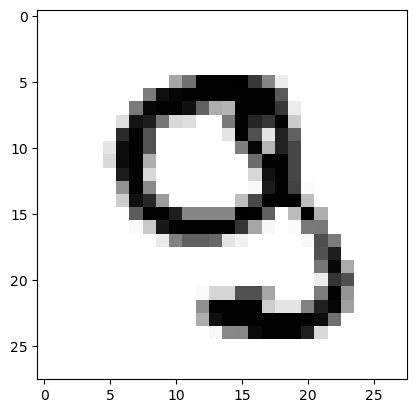

Classified as a 8 with probability 0.654104


In [28]:
img = errors[0]
plt.imshow(X_test[img], cmap=plt.get_cmap('gray_r'))
#plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [ ]:
y_test[img]